<a href="https://colab.research.google.com/github/klopetx/PHM_tutorial/blob/main/src/02.A_Feature_Extraction_I_time_domain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os

project_path = 'PHM_tutorial'


if not os.path.isdir(project_path):

  username = 'klopetx'
  repo = project_path

  !git clone https://@github.com/{username}/{repo}

os.chdir(project_path)

!python src/00_Environment_Checks.py


FEMTO dataset is already downloaded.


# Feature extraction

We just so how ward it is to obtain meaningfull informaton from raw signals.
That is why we try to characterize them in indicators/features/kpis so that we can summarise the content of the signal into meaningful data that represent how the signals has behaved.

One way of doing that is adding some "simple" statistical descriptors. These descriptors will try to represent the whole signal in different values that represent some behaviours of the signals.

##



In [2]:
import pandas as pd
import numpy as np
import sys
sys.path.append('src')
import auxiliars as aux

In [3]:
# Defining a "more complex" indicator
def calculate_crest_factor(x):
    peak_value = x.abs().max()
    rms = np.sqrt(np.mean(x**2))
    return peak_value / rms

# Defining all indicators to be extracted
indicators = {
    'max': lambda x: x.max(),
    'min': lambda x: x.min(),
    'sum_abs': lambda x: x.abs().sum(),
    'rms': lambda x: np.sqrt(np.mean(x**2)),
    'crest_factor': calculate_crest_factor
}


## A sandbox for time domain feature extraction

By using a small dummy dataset, we can validate the features we are willing to extract.

In [4]:
# Create a small dataset for validation
data = {
    'file_name': ['file1.csv', 'file1.csv', 'file2.csv', 'file2.csv', 'file3.csv'],
    'column1': [1, 2, 3, 4, 5],
    'column2': [5, 4, 3, 2, 1]
}

df2 = pd.DataFrame(data)
print(df2)


   file_name  column1  column2
0  file1.csv        1        5
1  file1.csv        2        4
2  file2.csv        3        3
3  file2.csv        4        2
4  file3.csv        5        1


Now, lets see if the values of the indicators are correct:

In [5]:
aux.compute_features(df2,2, indicators)

,file_name,max,min,sum_abs,rms,crest_factor
0,file1.csv,5.0,4.0,9.0,4.527693,1.104315
1,file2.csv,3.0,2.0,5.0,2.549510,1.176697
2,file3.csv,1.0,1.0,1.0,1.000000,1.000000


### Exercise

1) Would you be able to extract a new indicator from the ones visible on the slides? Modify the previous code.

# Extracting features from through the life of a Bearing

Now that we have a bunch of time domain features to be extracted, lets see what happens when we visualize the life of a bearing according to time domain indicators.

## Vibrations

### Data loading






In [6]:
path = "/content/PHM_tutorial/data/10. FEMTO Bearing/Learning_set/Bearing2_1"

file_prefix = 'acc_'

one_in = 50  # Change as needed to read every second, third, etc., file

vibrationDF = aux.concatenate_files(path, file_prefix, one_in, True)

vibrationDF.head()

Total number of listed files with prefix 'acc_': 911
Number of files read (based on one_in=50): 19


,0,1,2,3,4,5,OP_Condition,OPC_Test_Number,Test_Index,file_name
0,8,14,15,884410.0,-0.391,0.011,2,1,1,/content/PHM_tutorial/data/10. FEMTO Bearing/L...
1,8,14,15,884450.0,0.292,0.133,2,1,1,/content/PHM_tutorial/data/10. FEMTO Bearing/L...
2,8,14,15,884490.0,0.596,0.024,2,1,1,/content/PHM_tutorial/data/10. FEMTO Bearing/L...
3,8,14,15,884530.0,0.230,0.272,2,1,1,/content/PHM_tutorial/data/10. FEMTO Bearing/L...
4,8,14,15,884570.0,-0.225,0.272,2,1,1,/content/PHM_tutorial/data/10. FEMTO Bearing/L...


### Feature extraction

In [7]:
vibrationKPI = aux.compute_features(vibrationDF, 5, indicators, True)

In [8]:
vibrationKPI.head()

,file_name,max,min,sum_abs,rms,crest_factor,OP_Condition,OPC_Test_Number,Bearing,Test_Index
0,/content/PHM_tutorial/data/10. FEMTO Bearing/L...,0.861,-1.040,541.186,0.262582,3.960663,2,1,Bearing2_1,1
1,/content/PHM_tutorial/data/10. FEMTO Bearing/L...,1.028,-1.143,619.139,0.301586,3.789964,2,1,Bearing2_1,51
2,/content/PHM_tutorial/data/10. FEMTO Bearing/L...,1.061,-0.958,510.259,0.251626,4.216578,2,1,Bearing2_1,101
3,/content/PHM_tutorial/data/10. FEMTO Bearing/L...,2.493,-2.172,1017.155,0.520092,4.793384,2,1,Bearing2_1,151
4,/content/PHM_tutorial/data/10. FEMTO Bearing/L...,3.160,-2.940,1542.873,0.774481,4.080150,2,1,Bearing2_1,201


### Bearing data evolution

In [9]:
import matplotlib.pyplot as plt

def plot_signal(df, x_column, y_column):
    """
    Plot a signal from a DataFrame using the specified columns for the X and Y axes.

    Parameters:
    - df (pd.DataFrame): The DataFrame containing the data to plot.
    - x_column (str): The name of the column to use for the X-axis.
    - y_column (str): The name of the column to use for the Y-axis.
    """
    plt.figure(figsize=(10, 5))
    plt.plot(df[x_column], df[y_column], label=y_column)
    plt.title(f'{y_column} Signal Over {x_column}')
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.legend()
    plt.grid(True)
    plt.show()

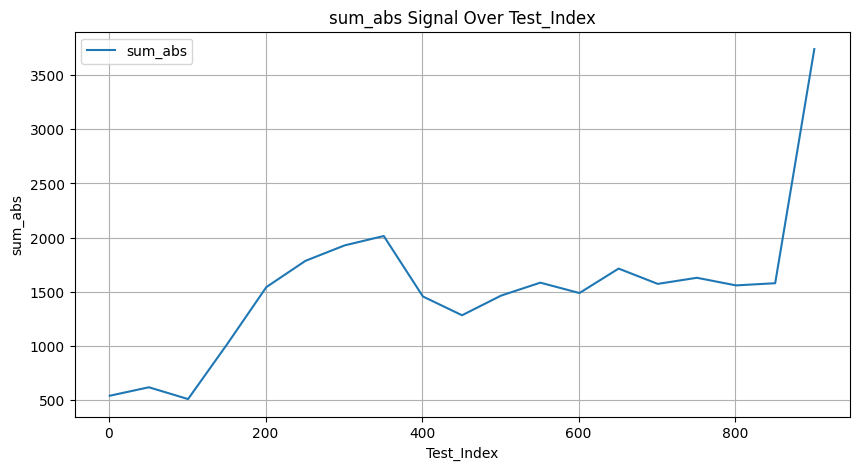

In [10]:
plot_signal(vibrationKPI, 'Test_Index', 'sum_abs')

## Exercises

2) Plot another all the remaining indicators, which one does seem to be better?

3) Repliclate the previous extraction for another bearing.

4) Replicate the previous extraction for temperature signals.

## Submission

Ensure the notebook runs from top to bottom before submitting it.